# 餐厅订单数据分析

## 模块导入、数据导入

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#数据导入
df1 = pd.read_excel(r"C:\Users\lihuiting\Desktop\数据分析案例应用\菜品数据分析\meal_order_detail.xlsx",sheet_name ='meal_order_detail1')
df2 = pd.read_excel(r"C:\Users\lihuiting\Desktop\数据分析案例应用\菜品数据分析\meal_order_detail.xlsx",sheet_name ='meal_order_detail2')
df3 = pd.read_excel(r"C:\Users\lihuiting\Desktop\数据分析案例应用\菜品数据分析\meal_order_detail.xlsx",sheet_name ='meal_order_detail3')
#合并数据
df = pd.concat([df1,df2,df3],axis = 0) #按照行进行拼接数据
df.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


## 数据预处理

In [3]:
df.info()
#关注order_id,counts,place_order_time,amounts

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_inprice 

In [4]:
df = df.dropna(axis=1)  #删除空值列
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [5]:
df.head()
#df[~df['counts']!=0]   已分析出该数据集所有的counts列值都为1，所以不用再算counts*amounts的值

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


# 数据分析

In [6]:
#求菜品的平均价格
import numpy as np
df['amounts'].mean()
round(np.mean(df['amounts']),2)

44.82

In [7]:
#求哪个菜最受欢迎
paixu = df['dishes_name'].value_counts()
likemost = paixu.idxmax()
paixu = paixu.sort_values(ascending = False)
likemost

'白饭/大碗'

In [8]:
like10 = paixu[0:10]  

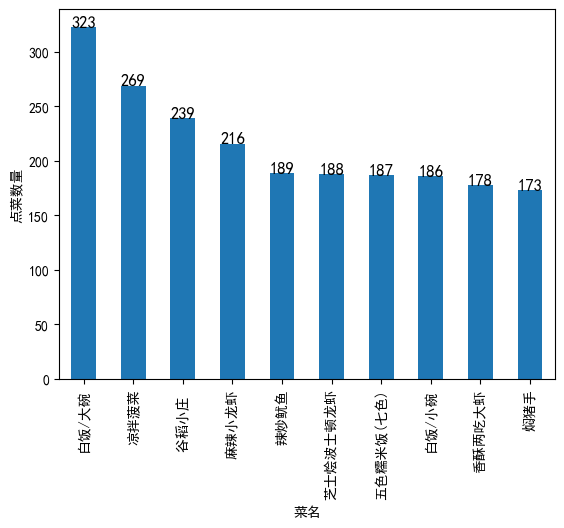

In [9]:
#数据可视化
plt.rcParams['font.sans-serif'] = ['SimHei']
like10.shape
like10.plot(kind='bar')
for x,y in enumerate(like10):   #索引遍历
    plt.text(x,y,y,ha='center',fontsize=12)   #绘制文本
plt.xlabel("菜名")
plt.ylabel("点菜数量")
plt.show()

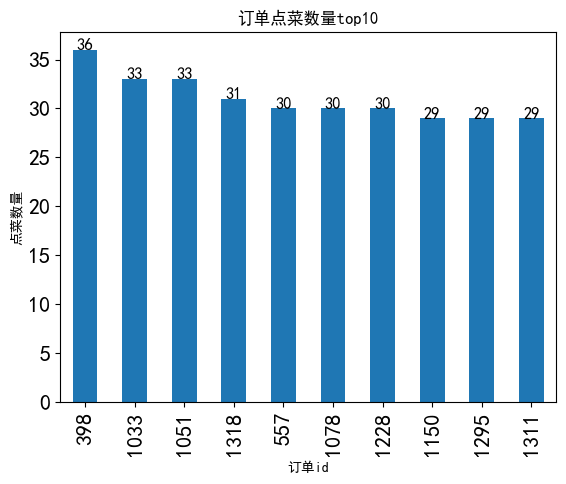

In [10]:
#寻找菜品数量最多的订单
findmost = df['counts'].groupby(df['order_id']).sum()
findmostid = findmost.sort_values(ascending=False)
findmostid = findmostid[0:10]
#findmostid
findmostid.plot(kind='bar',fontsize = 16)
plt.title("订单点菜数量top10")
for x,y in enumerate(findmostid):
    plt.text(x,y,y,ha='center',fontsize=12)
plt.xlabel("订单id")
plt.ylabel("点菜数量")
plt.show()

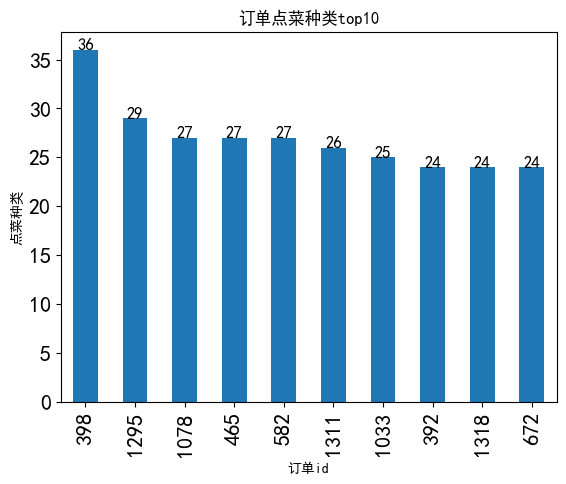

In [11]:
#寻找菜品种类最多的订单
fi = df['order_id'].value_counts()[0:10]
#fi
fi.plot(kind='bar',fontsize=16)
plt.title("订单点菜种类top10")
for x,y in enumerate(fi):   #索引遍历
    plt.text(x,y,y,ha='center',fontsize=12)   #绘制文本
plt.xlabel('订单id')
plt.ylabel('点菜种类')
plt.show()
#八月份餐厅订单点菜种类前10名，平均点菜25个菜品。


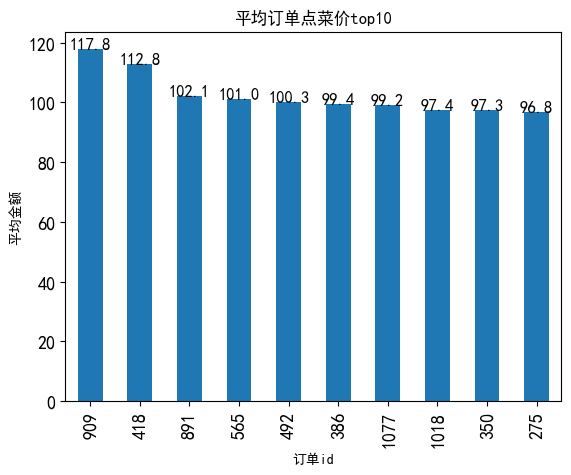

In [12]:
#找出平均点菜价格最贵的订单
takai = round(df['amounts'].groupby(df['order_id']).mean(),1)
takai = takai.sort_values(ascending=False)
takai1 = takai[0:10]
takai1.plot(kind='bar',fontsize=13)
plt.title("平均订单点菜价top10")
for x,y in enumerate(takai1):   #索引遍历
    plt.text(x,y,y,ha='center',fontsize=12)   #绘制文本
plt.xlabel('订单id')
plt.ylabel('平均金额')
plt.show()


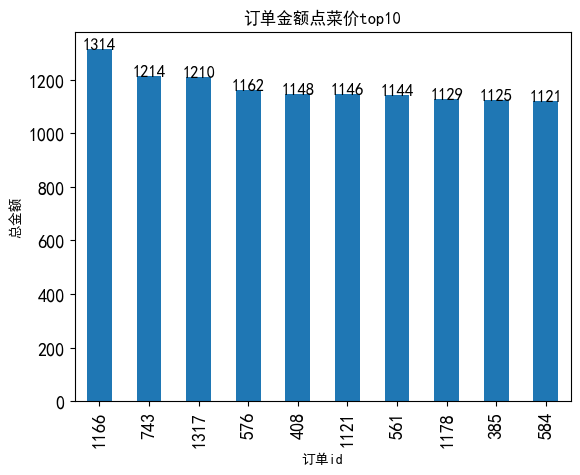

In [13]:
#找出点菜总价最贵的订单
taka = round(df['amounts'].groupby(df['order_id']).sum(),1)
taka = taka.sort_values(ascending=False)
taka1 = taka[0:10]
taka1.plot(kind='bar',fontsize=13)
plt.title("订单金额点菜价top10")
for x,y in enumerate(taka1):   #索引遍历
    plt.text(x,y,y,ha='center',fontsize=12)   #绘制文本
plt.xlabel('订单id')
plt.ylabel('总金额')
plt.show()

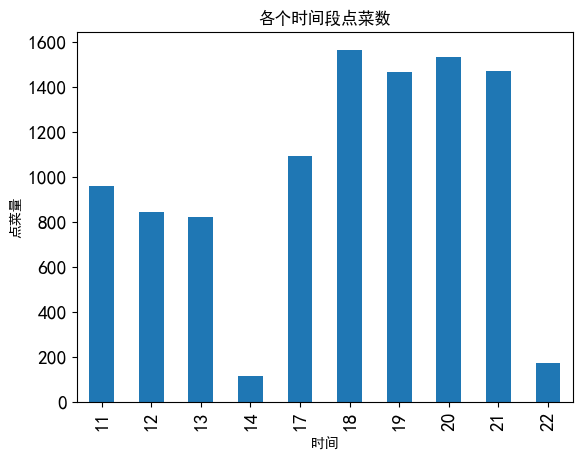

In [14]:
#一天中什么时间段订单数量多(时间段）
df['hourcount'] = 1   #添加一个新列，用途作计数
df['time'] = pd.to_datetime(df['place_order_time'])
df['hour'] = df['time'].dt.hour
#df['hour'] = df['time'].map(lambda x:x.hour)
dh = df['hourcount'].groupby(df['hour']).sum()
dh.plot(kind='bar',fontsize=14)
plt.title('各个时间段点菜数')
plt.xlabel('时间')
plt.ylabel('点菜量')
plt.show()
#这里不用排序                    

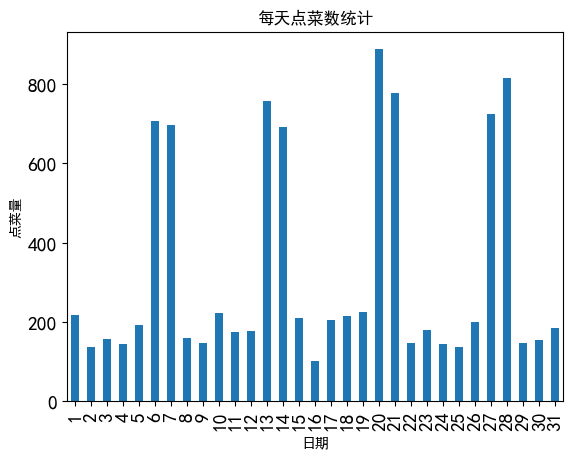

In [15]:
#八月份哪一天的订餐数量最多
df['datecount'] = 1 #创造计数器
df['day'] = df['place_order_time'].dt.day
most_day = df['datecount'].groupby(df['day']).sum()
most_day.plot(kind='bar',fontsize=14)
plt.title('每天点菜数统计')
plt.xlabel('日期')
plt.ylabel('点菜量')
plt.show()

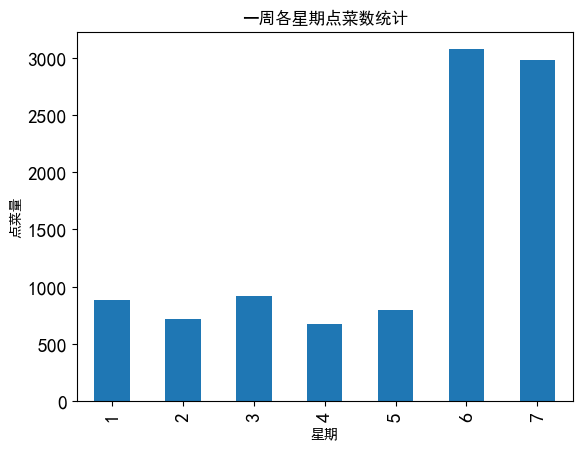

In [18]:
#星期几点菜数最多？
df['weekcount'] = 1
df['weekday'] = df['place_order_time'].dt.weekday+1
most_weekday = df['weekcount'].groupby(df['weekday']).sum()
most_weekday.plot(kind='bar',fontsize=14)
plt.title('一周各星期点菜数统计')
plt.xlabel('星期')
plt.ylabel('点菜量')
plt.show()